## ExMAS
> Equilibrium matching


In [1]:
import os
import math
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
cwd = os.getcwd()
%load_ext autoreload
%autoreload 2

In [2]:
from IPython.display import display
pd.options.display.max_columns = None

In [3]:
os.chdir(os.path.join(cwd,'../../..'))
import ExMAS.main
import ExMAS.utils
from ExMAS.utils import inData as inData
from ExMAS.main import matching
from ExMAS.extras import games, pricings, prunings, pipeline

In [4]:
params = ExMAS.utils.get_config('ExMAS/spinoffs/game/pipe.json') # load the default 
params.t0 = pd.to_datetime(params.t0)
params.matching_obj = 'u_pax'
inData = ExMAS.utils.load_G(inData, params, stats=True)  # download the graph
params.nP = 50
params.simTime = 0.1
params.shared_discount = 0.3
inData = ExMAS.utils.generate_demand(inData, params)  # generate requests

In [5]:
from ExMAS.main import init_log
params.logger_level = 'WARNING'
inData.logger = init_log(params)

In [6]:
inData = ExMAS.main(inData, params, plot = False)
KPIs = inData.sblts.res.to_frame('u_pax')
inData = games.prepare_PoA(inData)  # prepare data structures

11-02-21 09:26:29-WARNING-Prepare for game:  1/6
11-02-21 09:26:29-WARNING-Prepare for game:  2/6
11-02-21 09:26:30-WARNING-Prepare for game:  3/6
11-02-21 09:26:30-WARNING-Prepare for game:  4/6
11-02-21 09:26:40-WARNING-Prepare for game:  5/6
11-02-21 09:26:41-WARNING-Prepare for game:  6/6


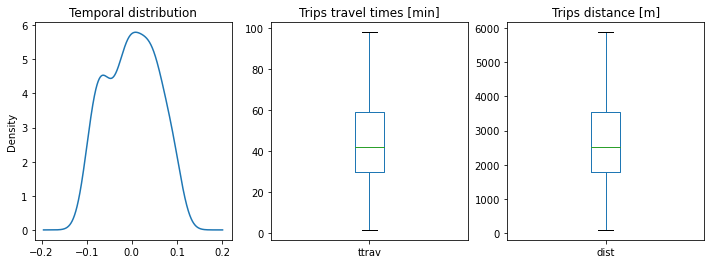

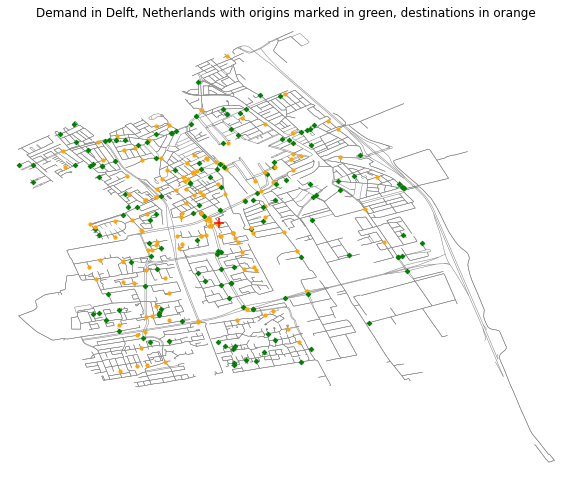

In [13]:
ExMAS.utils.plot_demand(inData, params)

### incidence matrix
rows are trips columns are rides,
1 if trip blongs to a ride, 0 otherwise

### parameters

eq. 1 , eq.2

In [7]:

params.time_cost = params.VoT # travellers' cost per travel time
params.wait_cost = params.time_cost*1.5 # and waiting
params.sharing_penalty_fixed = 0 # fixed penalty (EUR) per 
params.sharing_penalty_multiplier = 0.2 # fixed penalty (EUR) per 

params.veh_cost = 2.3*params.VoT/params.avg_speed # operating costs per kilometer
params.fixed_ride_cost = 0.5 # ride fixed costs (per vehicle)

In [12]:
inData = games.prepare_PoA(inData)

10-02-21 11:42:16-WARNING-Prepare for game:  1/6
10-02-21 11:42:16-WARNING-Prepare for game:  2/6
10-02-21 11:42:17-WARNING-Prepare for game:  3/6
10-02-21 11:42:17-WARNING-Prepare for game:  4/6
10-02-21 11:42:24-WARNING-Prepare for game:  5/6
10-02-21 11:42:25-WARNING-Prepare for game:  6/6


In [13]:
inData.sblts.rides_multi_index.loc[rs,:]

NameError: name 'rs' is not defined

In [8]:
plt.style.use(['science'])
os.environ["PATH"] += os.pathsep + '/Library/TeX/texbin'
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']



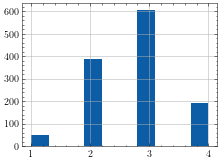

In [9]:
inData.sblts.rides_multi_index.degree.hist()

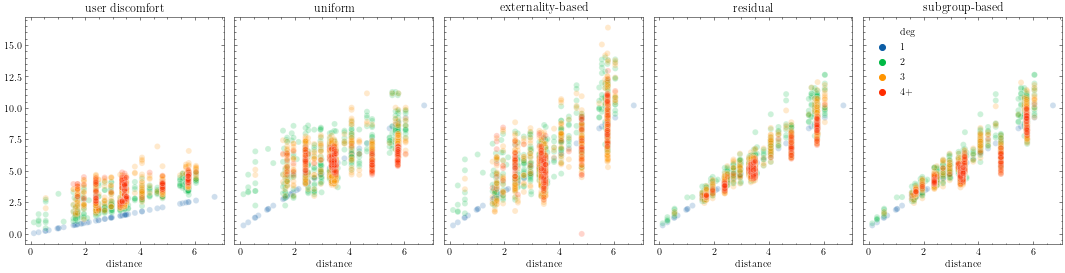

In [26]:
df = rm
palette = sns.color_palette(colors[0:4])
df['travel time'] = df['ttrav_sh']
df['user discomfort'] = df['cost_user']
cols = ['user discomfort','UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']
titles = ['user discomfort','uniform', 'externality-based','residual','subgroup-based']

fig, axes = plt.subplots(1,len(cols), figsize = (len(cols)*3,4), sharey=True)
df = inData.sblts.rides_multi_index
df['deg'] = df.degree.apply(lambda x: '4+' if x>3 else str(x))
df['distance'] = df['dist']/1000

for i,col in enumerate(cols):
    
    
    axes[i].set_title(titles[i])
    sns.scatterplot(x='distance',y=col, data = df, ax = axes[i], hue = 'deg', alpha = 0.2, palette = palette)
    axes[i].set_ylabel('')
    if i<len(cols)-1:
        axes[i].get_legend().remove()
#plf.savefig('f3.png')
plt.tight_layout() 
#plt.savefig('res_1.tiff', dpi = 600)
#plt.savefig('res_1.jpg', dpi = 600)
#plt.savefig('res_1.pdf', rasterized = True)

In [23]:
rs = inData.sblts.rides.iloc[-4].name
rm = inData.sblts.rides_multi_index
inData = pricings.subgroup_split(inData) 
group = inData.sblts.rides_multi_index.loc[rs,:]
group

,ride,traveller,shared,degree,treq,ride_time,dist,ttrav,ttrav_sh,delay,distance,cost_veh,cost_user,total_group_cost,cost_single,total_singles,residual_user,UNIFORM,desired_UNIFORM,EXTERNALITY,desired_EXTERNALITY,RESIDUAL,desired_RESIDUAL,price_subgroup,SUBGROUP
29,491,29,True,4,203,1006,5762,720,1006,14.0,8048,8.5983,4.29870,22.52865,8.81600,23.54075,-1.0121,5.632162,5.382000,10.542875,5.737550,8.436969,7.050870,8.8160,9.169883
38,491,38,True,4,273,1006,3439,429,608,1.0,8048,8.5983,2.55885,22.52865,5.45495,23.54075,-1.0121,5.632162,3.967258,5.169150,2.368975,5.220422,4.187759,4.5830,4.801967
32,491,32,True,4,224,1006,2390,298,586,72.0,8048,8.5983,2.83920,22.52865,3.94190,23.54075,-1.0121,5.632162,3.941900,5.857075,1.817025,3.772424,3.208661,3.9419,4.100132
36,491,36,True,4,245,1006,3346,418,858,120.0,8048,8.5983,4.23360,22.52865,5.32790,23.54075,-1.0121,5.632162,3.879817,5.839400,2.970625,5.098835,4.090222,4.2428,4.456667


In [25]:
group.SUBGROUP.sum()

22.52865

In [17]:
inData.sblts.rides.loc[491].to_frame().T

,indexes,u_pax,u_veh,kind,u_paxes,times,indexes_orig,indexes_dest,degree,index,lambda_r,PassHourTrav_ns,row,selected,treqs,deps,delays,ttravs,pruned,indexes_set,subgroups,supergroups,rankings,mean_ranking,rel_rankings,mean_rel_ranking,PoAs,mean_PoA,total_PoA,squared_PoA,probs,min_prob,logsum_prob,costs_user,costs_veh,costs_total,total_group_cost,cost_efficiency,total_singles,residual,UNIFORM,EXTERNALITY,RESIDUAL,total_price_subgroup,excess_subgroup,SUBGROUP
491,"[29, 38, 32, 36]",27.5411,1006,42,"[10.709299999999999, 6.38645, 4.32949999999999...","[217.0, 57, 22, 69, 277, 190, 50, 341]","[29, 38, 32, 36]","[32, 38, 36, 29]",4,491,0.46059,1865,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",0,"[203, 273, 224, 245]","[217.0, 274.0, 296.0, 365.0]","[14.0, 1.0, 72.0, 120.0]","[1006, 608, 586, 858]",True,"{32, 36, 29, 38}","[29, 32, 36, 38, 70, 72, 79, 80, 134, 136, 138...","[485, 487, 488, 489, 491]","[109.0, 116.0, 64.0, 67.0]",89,"[0.7124183006535948, 0.8405797101449275, 0.703...",0.716346,"[1.1999999999999993, 0.8000000000000007, 0.399...",0.775,3.1,0.6825,"[1.1788911165694262e-06, 3.575666279504162e-05...",1.17889e-06,-38.5937,13.9304,8.5983,22.5286,22.5286,5.63216,23.5407,-1.0121,22.5286,22.5286,-1.0121,21.5837,-0.94495,20.6388


In [11]:
inData = pricings.subgroup_split(inData) 

### pricings with various strategies

In [10]:
inData = ExMAS.extras.pricings.update_costs(inData, params)
inData = pricings.uniform_split(inData) 
inData = pricings.externality_split(inData) 
inData = pricings.residual_split(inData) 
inData = pricings.subgroup_split(inData) 
rs = inData.sblts.rides.sample(4).index
plt.rcParams['figure.figsize'] = [12,12]
fig, ax = plt.subplots()
#scatter_matrix(inData.sblts.rides_multi_index[['dist', 'ttrav_sh', 'UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP', 'total_group_cost']], grid = False, diagonal = 'kde', alpha = 0.2, ax = ax)
fig.suptitle('correlations between various prices and features')
inData.sblts.rides_multi_index.loc[rs,:]

AttributeError: 'Series' object has no attribute 'excess_subgroup'

# Differences between algorithms and pricings

## TNE

In [12]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TNE, PRICING = PRICING, ALGO = 'TNE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:10-WARNING-Pruned nRides 51/222
15-12-20 16:21:10-WARNING-UNIFORM-TNE-UNIFORM-min
15-12-20 16:21:11-INFO-Matching 50 trips to 222 rides in order to min UNIFORM
15-12-20 16:21:11-INFO-Problem solution: Optimal. 
Total costs for single trips:            162 
reduced by matching to:                  159
15-12-20 16:21:11-INFO-DotMap(VehHourTrav=15108, VehHourTrav_ns=17058, PassHourTrav=17711, PassHourTrav_ns=17058, PassUtility=253.51685, PassUtility_ns=264.633, mean_lambda=0.30019524894240157, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=36, PAIRS=7, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.28, fleet_size_nonshared=45.0, fleet_size_shared=38.0, lambda_shared=0.30019524894240157)
15-12-20 16:21:11-WARNING-Pruned nRides 61/222
15-12-20 16:21:11-WARNING-EXTERNALITY-TNE-EXTERNALITY-min
15-12-20 16:21:12-INFO-Matching 50 trips to 222 rides in order to min EXTERNALITY
15-12-20 16:21:12-INFO-Problem solution

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15815,19702,0.76,88.755,100.877,31,162.314


## Hermetic

In [13]:
ret = dict()
params.logger_level = 'WARNING'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_HERMETIC, PRICING = PRICING, ALGO = 'HERMETIC', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:15-WARNING-Pruned nRides 51/222
15-12-20 16:21:15-WARNING-UNIFORM-HERMETIC-UNIFORM-min
15-12-20 16:21:16-WARNING-Pruned nRides 58/222
15-12-20 16:21:16-WARNING-EXTERNALITY-HERMETIC-EXTERNALITY-min
15-12-20 16:21:17-WARNING-Pruned nRides 58/222
15-12-20 16:21:17-WARNING-RESIDUAL-HERMETIC-RESIDUAL-min
15-12-20 16:21:20-WARNING-Pruned nRides 222/222
15-12-20 16:21:20-WARNING-SUBGROUP-HERMETIC-SUBGROUP-min


,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15815,19702,0.76,88.755,100.877,31,162.314


## RUE

In [14]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RUE, PRICING = PRICING, ALGO = 'RUE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:21-INFO-Mergeable groups: 25-30
15-12-20 16:21:22-INFO-Mergeable groups: 5-88
15-12-20 16:21:22-INFO-Mergeable groups: 47-148
15-12-20 16:21:22-WARNING-Pruned nRides 222/222
15-12-20 16:21:22-WARNING-UNIFORM-RUE-UNIFORM-min
15-12-20 16:21:22-INFO-Matching 50 trips to 222 rides in order to min UNIFORM
15-12-20 16:21:22-INFO-Adding 3 mutually exlcusive constrains
15-12-20 16:21:22-INFO-Problem solution: Optimal. 
Total costs for single trips:            162 
reduced by matching to:                  159
15-12-20 16:21:22-INFO-DotMap(VehHourTrav=15108, VehHourTrav_ns=17058, PassHourTrav=17711, PassHourTrav_ns=17058, PassUtility=253.51685, PassUtility_ns=264.633, mean_lambda=0.30019524894240157, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=36, PAIRS=7, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.28, fleet_size_nonshared=45.0, fleet_size_shared=38.0, lambda_shared=0.30019524894240157)
15-12-20 16:21:22-INFO

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15815,19702,0.76,88.755,100.877,31,162.314


## RSIE

In [15]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_RSIE, PRICING = PRICING, ALGO = 'RSIE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:21:27-WARNING-Searching unstable pairs 0/222. 0 found so far
15-12-20 16:21:36-WARNING-Searching unstable pairs 20/222. 96 found so far
15-12-20 16:21:44-WARNING-Searching unstable pairs 40/222. 157 found so far
15-12-20 16:21:51-WARNING-Searching unstable pairs 60/222. 186 found so far
15-12-20 16:21:56-WARNING-Searching unstable pairs 80/222. 193 found so far
15-12-20 16:22:01-WARNING-Searching unstable pairs 100/222. 205 found so far
15-12-20 16:22:06-WARNING-Searching unstable pairs 120/222. 205 found so far
15-12-20 16:22:10-WARNING-Searching unstable pairs 140/222. 210 found so far
15-12-20 16:22:15-WARNING-Searching unstable pairs 160/222. 239 found so far
15-12-20 16:22:19-WARNING-Searching unstable pairs 180/222. 239 found so far
15-12-20 16:22:24-WARNING-Searching unstable pairs 200/222. 240 found so far
15-12-20 16:22:28-WARNING-Searching unstable pairs 220/222. 240 found so far
15-12-20 16:22:28-WARNING-Pruned nRides 222/222
15-12-20 16:22:28-WARNING-UNIFORM-RSI

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,15108,17711,0.28,90.7192,68.9161,43,159.635
EXTERNALITY,15108,17711,0.28,90.7192,68.9161,43,159.635
RESIDUAL,15108,17711,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,15197,19623,0.8,85.5113,95.9004,30,162.314


## TSE

In [16]:
ret = dict()
params.logger_level = 'INFO'
inData.logger = init_log(params)
for PRICING in ['UNIFORM','EXTERNALITY','RESIDUAL','SUBGROUP']:
    inData = pipeline.single_eval(inData, params, prunings.algo_TSE, PRICING = PRICING, ALGO = 'TSE', minmax = ['min'], store_res = False)
    inData.sblts.res['costs_veh'] = inData.sblts.rides[inData.sblts.rides.selected==1]['costs_veh'].sum()
    inData.sblts.res['obj'] = inData.sblts.rides[inData.sblts.rides.selected==1][PRICING].sum()
    inData.sblts.res['costs_user'] = inData.sblts.rides[inData.sblts.rides.selected==1][ 'costs_user'].sum()
    inData.sblts.res['pruned'] = inData.sblts.rides[inData.sblts.rides.selected==1].shape[0]
    ret[PRICING] = inData.sblts.res.loc[['VehHourTrav','PassHourTrav','shared_ratio','costs_veh', 'costs_user','pruned', 'obj']]
pd.DataFrame(ret).T

15-12-20 16:25:26-WARNING-Pruned nRides 222/222
15-12-20 16:25:26-INFO-DotMap(VehHourTrav=16748, VehHourTrav_ns=17058, PassHourTrav=19623, PassHourTrav_ns=17058, PassUtility=248.87515, PassUtility_ns=264.633, mean_lambda=0.30825496342737724, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=48, PAIRS=1, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.040000000000000036, fleet_size_nonshared=45.0, fleet_size_shared=44.0, lambda_shared=0.953082919914954)
15-12-20 16:25:26-WARNING-Pruned nRides 222/222
15-12-20 16:25:26-INFO-DotMap(VehHourTrav=16748, VehHourTrav_ns=17058, PassHourTrav=19623, PassHourTrav_ns=17058, PassUtility=248.87515, PassUtility_ns=264.633, mean_lambda=0.30825496342737724, revenue_s=17910.899999999998, revenue_ns=25587.0, Fare_Discount=-0.3000000000000001, nR=50, SINGLE=48, PAIRS=1, TRIPLES=0, QUADRIPLES=0, QUINTETS=0, PLUS5=0, shared_ratio=0.040000000000000036, fleet_size_nonshared=45.0, fleet_size_shared=4

,VehHourTrav,PassHourTrav,shared_ratio,costs_veh,costs_user,pruned,obj
UNIFORM,16748,19623,0.04,100.772,61.3221,49,162.094
EXTERNALITY,16748,19623,0.04,100.772,61.3221,49,162.094
RESIDUAL,15108,19623,0.28,90.7192,68.9161,43,-2.6817
SUBGROUP,17058,19623,0,102.614,59.703,50,162.314


---
(c) Rafał Kucharski, Delft, 2020